In [1]:
import pandas as pd
from pandas import json_normalize
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

#Funções

In [2]:
# FUNÇÃO PARA ANÁLISE CATEGÓRICA

def analise_categorica(df, coluna):

    print(f"Análise da variável categórica: {coluna}", end='\n\n')

    # Identificar e exibir os tipos de dados únicos na coluna
    tipos_unicos = df[coluna].apply(type).unique()
    print(f"Tipos de dados: {tipos_unicos}", end='\n\n')

    # Contagem de valores nulos ou ausentes
    nulos = df[coluna].isnull().sum()
    print(f"Quantidade de valores nulos ou ausentes: {nulos}", end='\n\n')

    # Limpar e padronizar strings, se forem de fato strings
    if pd.api.types.is_string_dtype(df[coluna]):
        df_normalizado.loc[:, coluna] = df_normalizado[coluna].str.upper().str.strip()

    # Contagem de valores únicos
    print(f"Quantidade de valores únicos: {df[coluna].nunique()}", end='\n\n')

    # Exibir os valores únicos
    print("Valores únicos: ", df[coluna].unique(), end='\n\n')

    # Contagem de frequência dos valores
    print("Contagem de frequência dos valores:")
    contagem_frequencia = df[coluna].value_counts()
    print(contagem_frequencia, end='\n\n')

    # Criar um gráfico de barras para a contagem de classes
    plt.figure(figsize=(7, 4))
    ax = contagem_frequencia.plot(kind='bar')
    plt.xlabel(f'Classes de {coluna}')
    plt.ylabel('Contagem')
    plt.title(f'Contagem de classes da variável {coluna}')

    # Adicionar rótulos numéricos
    for i, v in enumerate(contagem_frequencia):
      ax.text(i, v + 0.2, str(v), ha='center', va='bottom')

plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# Função para análise de dados numéricos contínuos
def analise_numerica(df, coluna):
    print(f"Análise da variável numérica: {coluna.upper()}", end='\n\n')

    # Verificar e exibir o tipo de dados
    tipo_dado = df[coluna].dtype
    print(f"Tipo de dado: {tipo_dado}", end='\n\n')

    # Média
    media = round(df[coluna].mean(), 2)
    print(f"Média: {media}", end='\n\n')

    # Mediana
    mediana = round(df[coluna].median(), 2)
    print(f"Mediana: {mediana}", end='\n\n')

    # Moda
    moda = round(df[coluna].mode()[0], 2)  # Pegando o primeiro valor da moda
    print(f"Moda: {moda}", end='\n\n')

    # Desvio padrão
    desvio_padrao = round(df[coluna].std(), 2)
    print(f"Desvio Padrão: {desvio_padrao}", end='\n\n')

    # Mínimo
    minimo = round(df[coluna].min(), 2)
    print(f"Valor Mínimo: {minimo}", end='\n\n')

    # Máximo
    maximo = round(df[coluna].max(), 2)
    print(f"Valor Máximo: {maximo}", end='\n\n')

    # Quartis
    q1, q3 = round(df[coluna].quantile(0.25), 2), round(df[coluna].quantile(0.75), 2)
    print(f"1º Quartil: {q1}", end='\n\n')
    print(f"3º Quartil: {q3}", end='\n\n')

    # Intervalo Interquartil (IQR)
    iqr = round(q3 - q1, 2)
    print(f"Intervalo Interquartil (IQR): {iqr}", end='\n\n')

# Função para imprimir boxplot de variáveis numéricas
def imprime_boxplot(df, coluna):

    # Definindo o tamanho da figura
    plt.figure(figsize=(8, 4))

    # Geração do boxplot
    sns.boxplot(x=df[coluna])

    # Definindo o título do gráfico
    plt.title(f'Boxplot de {coluna}')

    # Definindo o rótulo do eixo x
    plt.xlabel(coluna)

    # Exibindo o gráfico
    plt.show()

# Função para análise numérica completa
def analise_numerica_completa(df, coluna):
    # Tentativa de conversão da coluna para float
    try:
        df[coluna] = df[coluna].astype(float)
    except ValueError:
        print(f"Não foi possível converter a coluna {coluna} para um tipo numérico.")
        return

    analise_numerica(df, coluna)
    imprime_boxplot(df, coluna)


def plot_churn_by_feature(df, col_churn, col_feature, colors_sim=['darkred', 'lightcoral'], colors_nao=['darkgreen', 'lightgreen']):
    # Agrupando e contando as ocorrências
    df_grouped = df.groupby([col_churn, col_feature]).size().reset_index(name='Contagem')

    # Calculando a soma total de contagens para cada categoria de 'col_churn'
    total_counts = df_grouped.groupby(col_churn)['Contagem'].transform('sum')

    # Normalizando as contagens para obter proporções
    df_grouped['Proporcao'] = df_grouped['Contagem'] / total_counts

    # Configurações de plotagem
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))

    # Dados para 'Rotatividade: SIM'
    df_sim = df_grouped[df_grouped[col_churn] == 'SIM']

    # Dados para 'Rotatividade: NÃO'
    df_nao = df_grouped[df_grouped[col_churn] == 'NÃO']

    # Plot para 'Rotatividade: SIM'
    axs[0].bar(df_sim[col_feature], df_sim['Proporcao'], color=colors_sim)
    axs[0].set_title(f'{col_churn}: SIM')
    axs[0].set_xlabel(col_feature)
    axs[0].set_ylabel('Proporção')

    # Plot para 'Rotatividade: NÃO'
    axs[1].bar(df_nao[col_feature], df_nao['Proporcao'], color=colors_nao)
    axs[1].set_title(f'{col_churn}: NÃO')
    axs[1].set_xlabel(col_feature)
    axs[1].set_ylabel('Proporção')

    # Legendas e Títulos
    for ax in axs:
        ax.legend(df_grouped[col_feature].unique())

    plt.suptitle(f'{col_churn} por {col_feature}')
    plt.show()

# <font color='magenta'><b>BASE DE DADOS:</b>

Churn de Clientes - Descrição
Através da API da Novexus, teremos acesso à base de dados e às suas informações.

Para isso, basta acessar a Base de dados - Novexus.

https://challenge-data-science-3ed.s3.amazonaws.com/Telco-Customer-Churn.json

In [3]:
uri = 'https://challenge-data-science-3ed.s3.amazonaws.com/Telco-Customer-Churn.json'
dados = pd.read_json(uri)
print(type(dados))
dados.sample(1)

<class 'pandas.core.frame.DataFrame'>


,customerID,Churn,customer,phone,internet,account
1275,1834-WULEG,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'One year', 'PaperlessBilling': '..."


In [4]:
# percorre todas as Series do DataFrame e identifica os tipos de dados.
for coluna in dados:
    tipos_unicos = dados[coluna].apply(type).unique()
    print(f"Coluna: {coluna} - Tipos de dados: {tipos_unicos}")

Coluna: customerID - Tipos de dados: [<class 'str'>]
Coluna: Churn - Tipos de dados: [<class 'str'>]
Coluna: customer - Tipos de dados: [<class 'dict'>]
Coluna: phone - Tipos de dados: [<class 'dict'>]
Coluna: internet - Tipos de dados: [<class 'dict'>]
Coluna: account - Tipos de dados: [<class 'dict'>]


## Normalize a base de dados.

In [5]:
# Lista de colunas para normalizar
colunas_para_normalizar = ['customer', 'phone', 'internet', 'account']

# Inicializar um DataFrame para armazenar o resultado final
df_normalizado = dados.drop(colunas_para_normalizar, axis=1).copy()

# Loop através das colunas
for column in colunas_para_normalizar:
    # Aplique json_normalize para a coluna
    coluna_normalizada = json_normalize(dados[column])

    # Renomear colunas do DataFrame aplainado para evitar conflitos de nome
    coluna_normalizada.columns = [f"{column}_{subcol}" for subcol in coluna_normalizada.columns]

    # Concatene o DataFrame aplainado ao DataFrame final
    df_normalizado = pd.concat([df_normalizado, coluna_normalizada], axis=1)

pd.set_option('display.max_columns', 50)

# Exclui a series 'customerID'
df_normalizado = df_normalizado.drop('customerID', axis=1)

# Exibe as primeiras linhas do DataFrame final
df_normalizado.head()

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## Utilize métodos que fornecem descrições estatísticas e resumo dos dados.

In [7]:
df_normalizado.columns

Index(['Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges.Monthly', 'account_Charges.Total'],
      dtype='object')

#### Churn: se o cliente deixou ou não a empresa - <font color='yellow'>variável alvo

Análise da variável categórica: Churn

Tipos de dados: [<class 'str'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 3

Valores únicos:  ['NO' 'YES' '']

Contagem de frequência dos valores:
NO     5174
YES    1869
        224
Name: Churn, dtype: int64



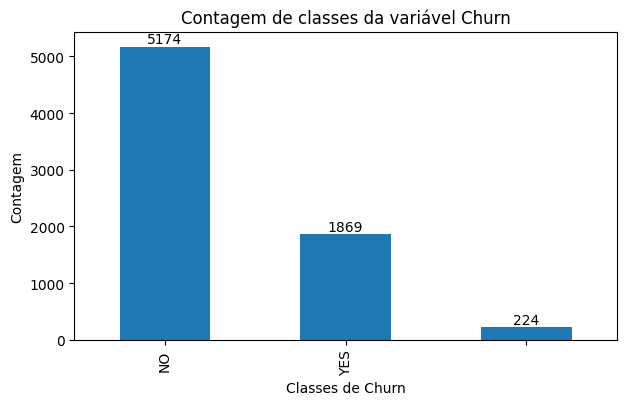

In [8]:
analise_categorica(df_normalizado, 'Churn')

In [9]:
# Criar um novo DataFrame contendo apenas as linhas onde 'Churn' é diferente de 'YES' ou 'NO'
df_no_churn = df_normalizado[(df_normalizado['Churn'] != 'YES') & (df_normalizado['Churn'] != 'NO')]

# Remover essas linhas do DataFrame original
df_normalizado = df_normalizado[(df_normalizado['Churn'] == 'YES') | (df_normalizado['Churn'] == 'NO')]

Análise da variável categórica: Churn

Tipos de dados: [<class 'str'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 2

Valores únicos:  ['NO' 'YES']

Contagem de frequência dos valores:
NO     5174
YES    1869
Name: Churn, dtype: int64



<ipython-input-2-5ae664f4f139>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normalizado.loc[:, coluna] = df_normalizado[coluna].str.upper().str.strip()


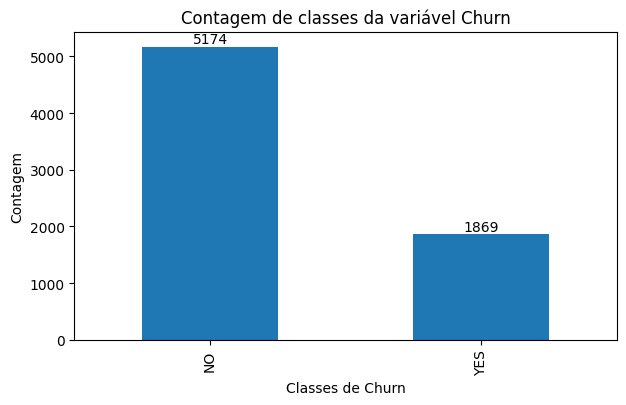

In [10]:
analise_categorica(df_normalizado, 'Churn')

#### gender: gênero (masculino e feminino)

Análise da variável categórica: customer_gender

Tipos de dados: [<class 'str'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 2

Valores únicos:  ['FEMALE' 'MALE']

Contagem de frequência dos valores:
MALE      3555
FEMALE    3488
Name: customer_gender, dtype: int64



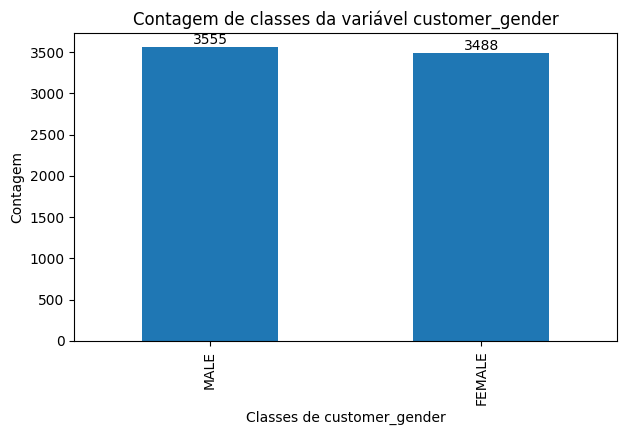

In [11]:
analise_categorica(df_normalizado, 'customer_gender')

####SeniorCitizen: informação sobre um cliente ter ou não idade igual ou maior que 65 anos

Análise da variável categórica: customer_SeniorCitizen

Tipos de dados: [<class 'int'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 2

Valores únicos:  [0 1]

Contagem de frequência dos valores:
0    5901
1    1142
Name: customer_SeniorCitizen, dtype: int64



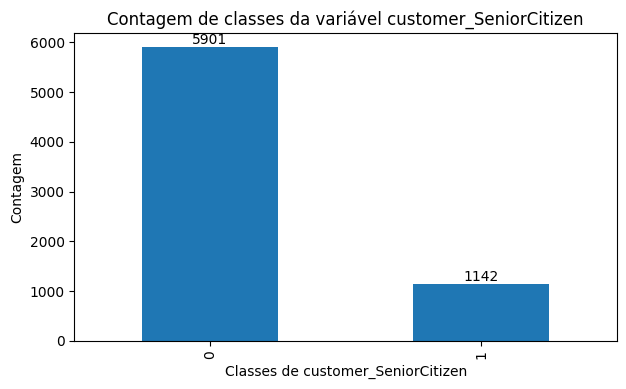

In [12]:
analise_categorica(df_normalizado, 'customer_SeniorCitizen')

#### Partner: se o cliente possui ou não um parceiro ou parceira

Análise da variável categórica: customer_Partner

Tipos de dados: [<class 'str'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 2

Valores únicos:  ['YES' 'NO']

Contagem de frequência dos valores:
NO     3641
YES    3402
Name: customer_Partner, dtype: int64



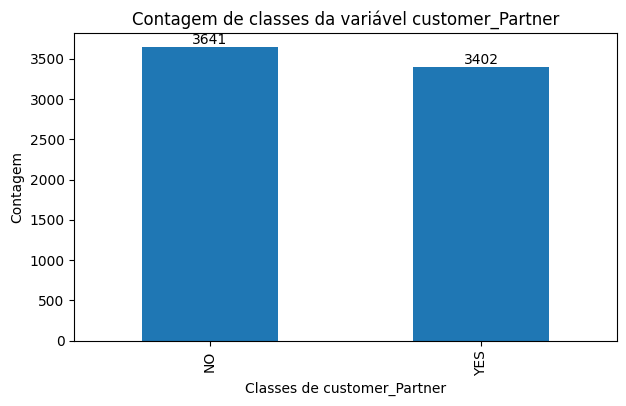

In [13]:
analise_categorica(df_normalizado, 'customer_Partner')

#### Dependents: se o cliente possui ou não dependentes

Análise da variável categórica: customer_Dependents

Tipos de dados: [<class 'str'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 2

Valores únicos:  ['YES' 'NO']

Contagem de frequência dos valores:
NO     4933
YES    2110
Name: customer_Dependents, dtype: int64



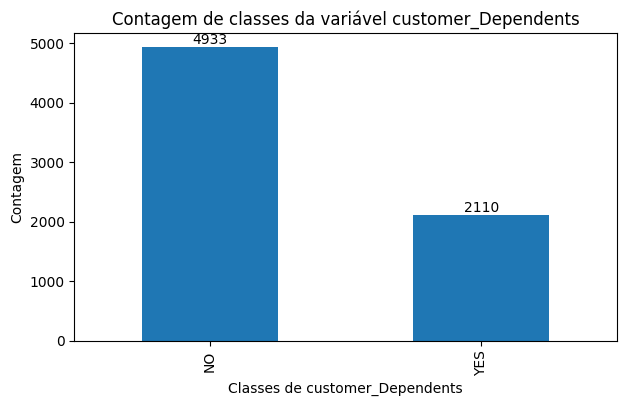

In [14]:
analise_categorica(df_normalizado, 'customer_Dependents')

#### tenure: meses de contrato do cliente

Análise da variável numérica: CUSTOMER_TENURE

Tipo de dado: float64

Média: 32.37

Mediana: 29.0

Moda: 1.0

Desvio Padrão: 24.56

Valor Mínimo: 0.0

Valor Máximo: 72.0

1º Quartil: 9.0

3º Quartil: 55.0

Intervalo Interquartil (IQR): 46.0



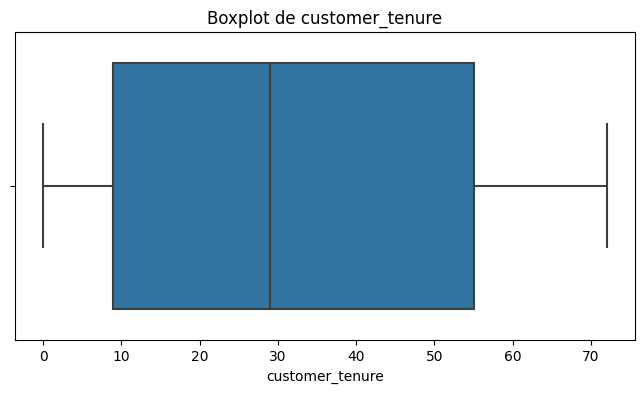

In [15]:
analise_numerica_completa(df_normalizado, 'customer_tenure')

####PhoneService: assinatura de serviço telefônico

Análise da variável categórica: phone_PhoneService

Tipos de dados: [<class 'str'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 2

Valores únicos:  ['YES' 'NO']

Contagem de frequência dos valores:
YES    6361
NO      682
Name: phone_PhoneService, dtype: int64



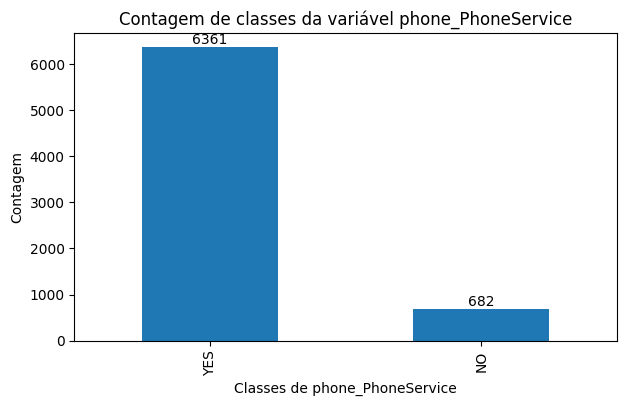

In [16]:
analise_categorica(df_normalizado, 'phone_PhoneService')

#### MultipleLines: assinatura de mais de uma linha de telefone

Análise da variável categórica: phone_MultipleLines

Tipos de dados: [<class 'str'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 3

Valores únicos:  ['NO' 'YES' 'NO PHONE SERVICE']

Contagem de frequência dos valores:
NO                  3390
YES                 2971
NO PHONE SERVICE     682
Name: phone_MultipleLines, dtype: int64



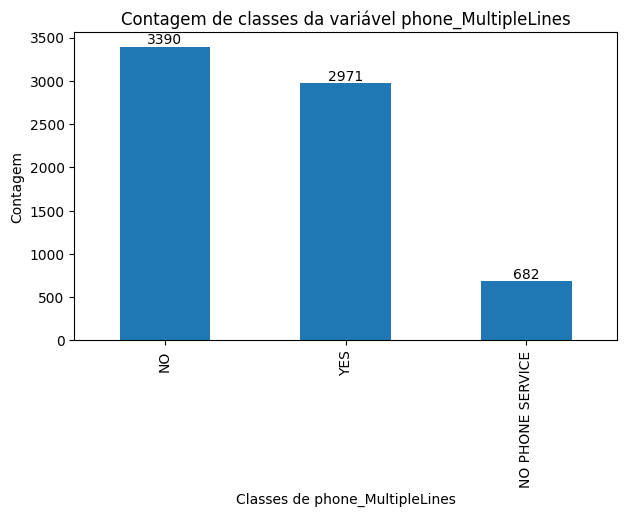

In [17]:
analise_categorica(df_normalizado, 'phone_MultipleLines')

In [18]:
# Substituir 'NO PHONE SERVICE' por 'NO'
df_normalizado['phone_MultipleLines'].replace('NO PHONE SERVICE', 'NO', inplace=True)

Análise da variável categórica: phone_MultipleLines

Tipos de dados: [<class 'str'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 2

Valores únicos:  ['NO' 'YES']

Contagem de frequência dos valores:
NO     4072
YES    2971
Name: phone_MultipleLines, dtype: int64



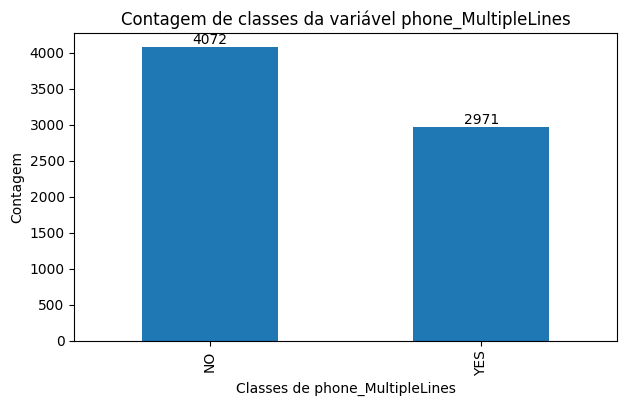

In [19]:
analise_categorica(df_normalizado, 'phone_MultipleLines')

#### InternetService: assinatura de um provedor de internet

Análise da variável categórica: internet_InternetService

Tipos de dados: [<class 'str'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 3

Valores únicos:  ['DSL' 'FIBER OPTIC' 'NO']

Contagem de frequência dos valores:
FIBER OPTIC    3096
DSL            2421
NO             1526
Name: internet_InternetService, dtype: int64



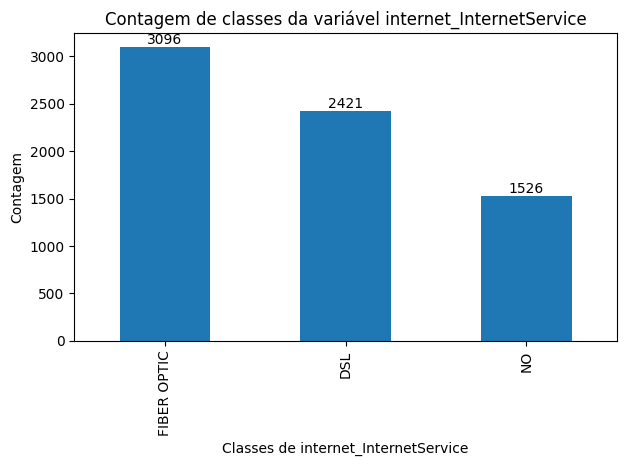

In [20]:
analise_categorica(df_normalizado, 'internet_InternetService')

Excluir a Series 'NO' que será criada após o one_hot.

####OnlineSecurity: assinatura adicional de segurança online

Análise da variável categórica: internet_OnlineSecurity

Tipos de dados: [<class 'str'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 3

Valores únicos:  ['NO' 'YES' 'NO INTERNET SERVICE']

Contagem de frequência dos valores:
NO                     3498
YES                    2019
NO INTERNET SERVICE    1526
Name: internet_OnlineSecurity, dtype: int64



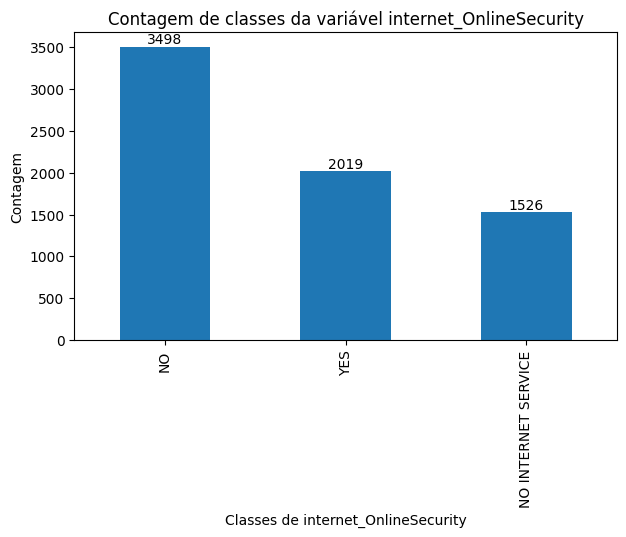

In [21]:
analise_categorica(df_normalizado, 'internet_OnlineSecurity')

In [22]:
# Exclui os registros da categoria NO INTERNET SERVICE, pois já existe a feature.
df_normalizado = df_normalizado.loc[df_normalizado['internet_OnlineSecurity'] != 'NO INTERNET SERVICE']

Análise da variável categórica: internet_OnlineSecurity

Tipos de dados: [<class 'str'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 2

Valores únicos:  ['NO' 'YES']

Contagem de frequência dos valores:
NO     3498
YES    2019
Name: internet_OnlineSecurity, dtype: int64



<ipython-input-2-5ae664f4f139>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normalizado.loc[:, coluna] = df_normalizado[coluna].str.upper().str.strip()


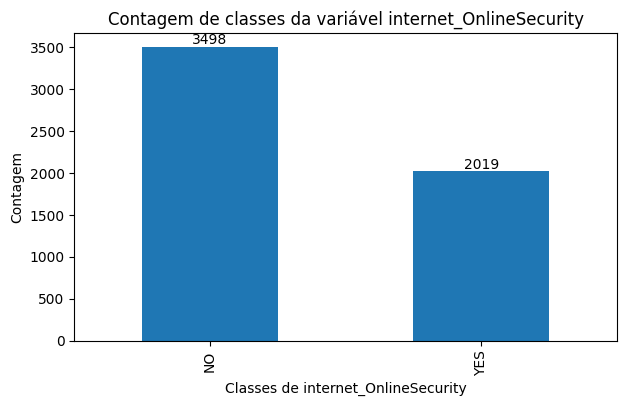

In [23]:
analise_categorica(df_normalizado, 'internet_OnlineSecurity')

####OnlineBackup: assinatura adicional de backup online

Análise da variável categórica: internet_OnlineBackup

Tipos de dados: [<class 'str'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 2

Valores únicos:  ['YES' 'NO']

Contagem de frequência dos valores:
NO     3088
YES    2429
Name: internet_OnlineBackup, dtype: int64



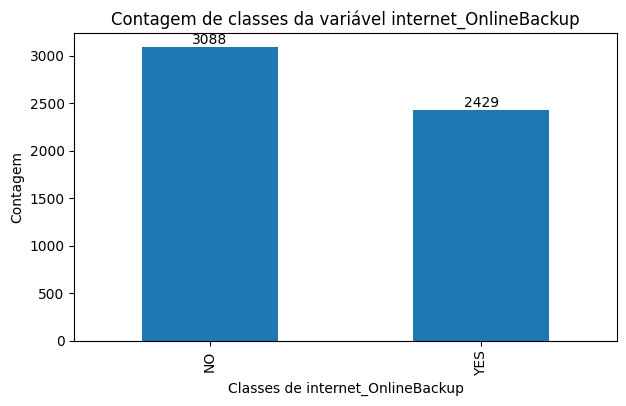

In [24]:
analise_categorica(df_normalizado, 'internet_OnlineBackup')

#### DeviceProtection: assinatura adicional de proteção no dispositivo

Análise da variável categórica: internet_DeviceProtection

Tipos de dados: [<class 'str'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 2

Valores únicos:  ['NO' 'YES']

Contagem de frequência dos valores:
NO     3095
YES    2422
Name: internet_DeviceProtection, dtype: int64



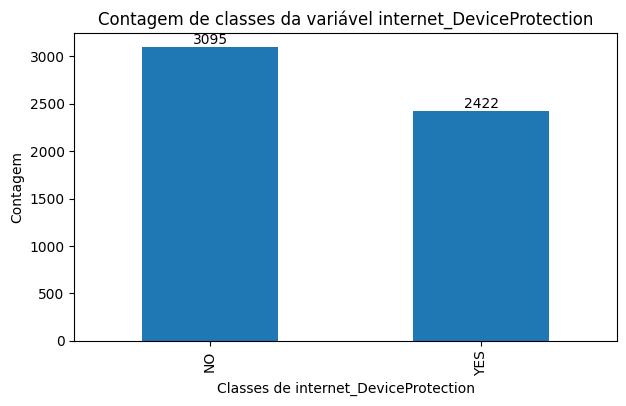

In [25]:
analise_categorica(df_normalizado, 'internet_DeviceProtection')

#### TechSupport: assinatura adicional de suporte técnico, menos tempo de espera

Análise da variável categórica: internet_TechSupport

Tipos de dados: [<class 'str'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 2

Valores únicos:  ['YES' 'NO']

Contagem de frequência dos valores:
NO     3473
YES    2044
Name: internet_TechSupport, dtype: int64



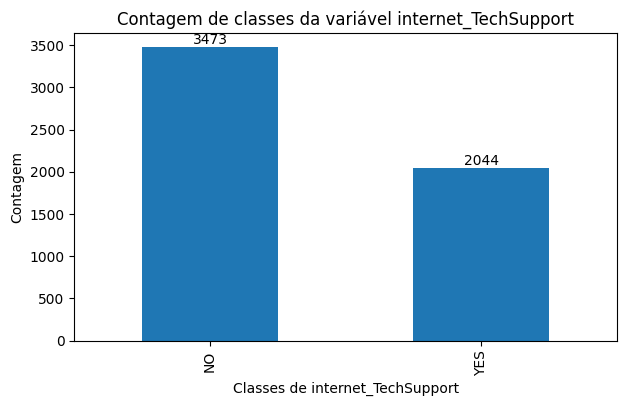

In [26]:
analise_categorica(df_normalizado, 'internet_TechSupport')

#### StreamingTV: assinatura de TV a cabo

Análise da variável categórica: internet_StreamingTV

Tipos de dados: [<class 'str'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 2

Valores únicos:  ['YES' 'NO']

Contagem de frequência dos valores:
NO     2810
YES    2707
Name: internet_StreamingTV, dtype: int64



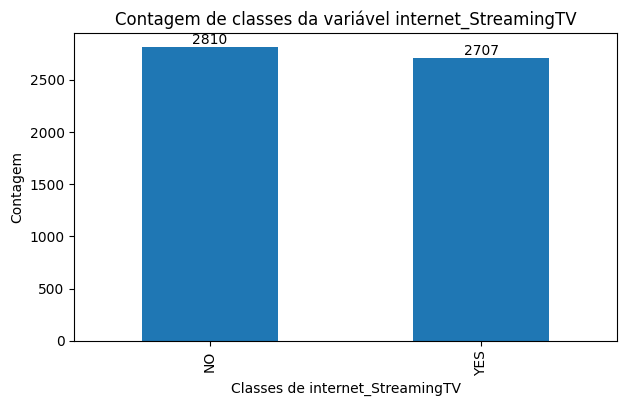

In [27]:
analise_categorica(df_normalizado, 'internet_StreamingTV')

#### StreamingMovies: assinatura de streaming de filmes

Análise da variável categórica: internet_StreamingMovies

Tipos de dados: [<class 'str'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 2

Valores únicos:  ['NO' 'YES']

Contagem de frequência dos valores:
NO     2785
YES    2732
Name: internet_StreamingMovies, dtype: int64



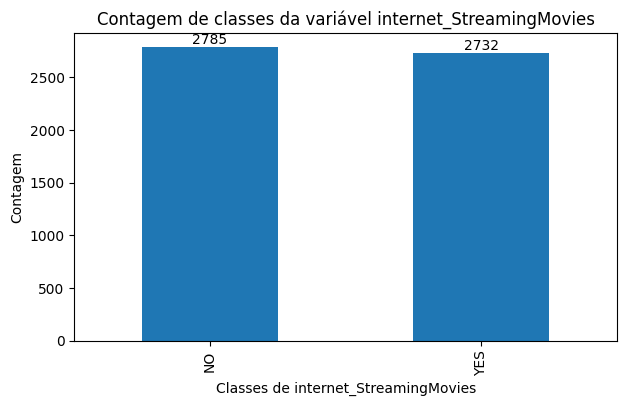

In [28]:
analise_categorica(df_normalizado, 'internet_StreamingMovies')

####Contract: tipo de contrato

Análise da variável categórica: account_Contract

Tipos de dados: [<class 'str'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 3

Valores únicos:  ['ONE YEAR' 'MONTH-TO-MONTH' 'TWO YEAR']

Contagem de frequência dos valores:
MONTH-TO-MONTH    3351
ONE YEAR          1109
TWO YEAR          1057
Name: account_Contract, dtype: int64



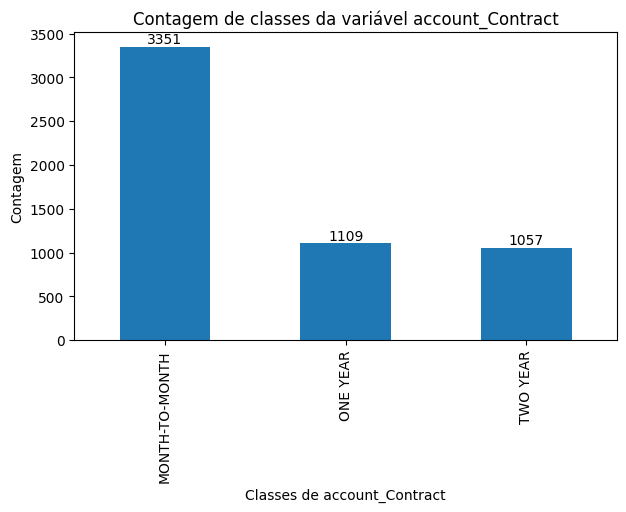

In [29]:
analise_categorica(df_normalizado, 'account_Contract')

#### PaperlessBilling: se o cliente prefere receber online a fatura

Análise da variável categórica: account_PaperlessBilling

Tipos de dados: [<class 'str'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 2

Valores únicos:  ['YES' 'NO']

Contagem de frequência dos valores:
YES    3725
NO     1792
Name: account_PaperlessBilling, dtype: int64



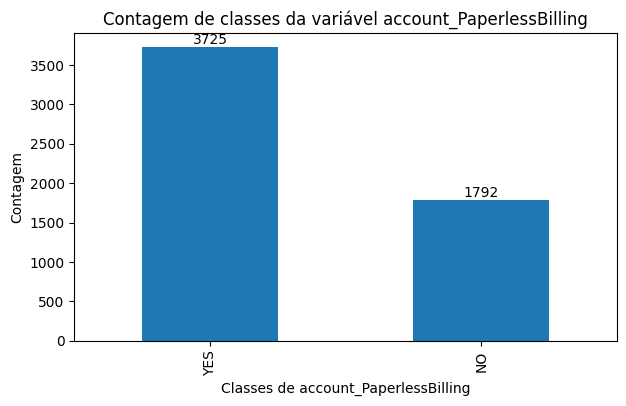

In [30]:
analise_categorica(df_normalizado, 'account_PaperlessBilling')

#### PaymentMethod: forma de pagamento

Análise da variável categórica: account_PaymentMethod

Tipos de dados: [<class 'str'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 4

Valores únicos:  ['MAILED CHECK' 'ELECTRONIC CHECK' 'CREDIT CARD (AUTOMATIC)'
 'BANK TRANSFER (AUTOMATIC)']

Contagem de frequência dos valores:
ELECTRONIC CHECK             2243
BANK TRANSFER (AUTOMATIC)    1212
CREDIT CARD (AUTOMATIC)      1191
MAILED CHECK                  871
Name: account_PaymentMethod, dtype: int64



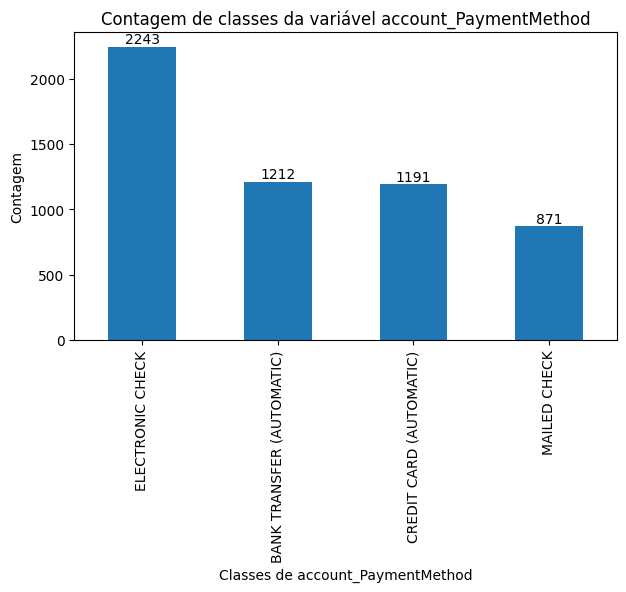

In [31]:
analise_categorica(df_normalizado, 'account_PaymentMethod')

#### Charges.Monthly: total de todos os serviços do cliente por mês

Análise da variável numérica: ACCOUNT_CHARGES.MONTHLY

Tipo de dado: float64

Média: 76.84

Mediana: 79.45

Moda: 84.8

Desvio Padrão: 21.92

Valor Mínimo: 23.45

Valor Máximo: 118.75

1º Quartil: 59.95

3º Quartil: 94.45

Intervalo Interquartil (IQR): 34.5



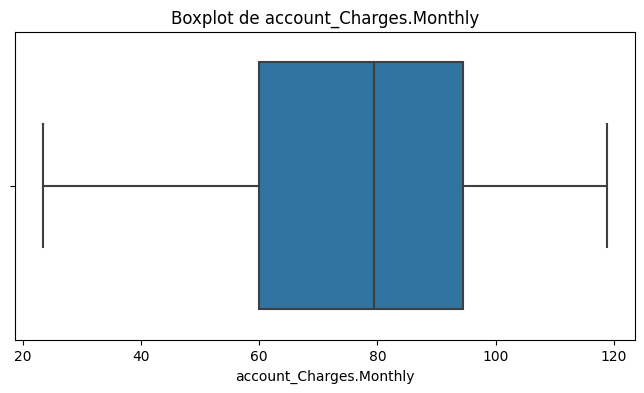

In [32]:
analise_numerica_completa(df_normalizado, 'account_Charges.Monthly')

#### Charges.Total: total gasto pelo cliente - (var numérica)

In [33]:
analise_numerica_completa(df_normalizado, 'account_Charges.Total')

Não foi possível converter a coluna account_Charges.Total para um tipo numérico.


In [34]:
# Identificar e exibir os tipos de dados únicos na coluna
tipos_unicos = df_normalizado['account_Charges.Total'].apply(type).unique()
print(f"Tipos de dados: {tipos_unicos}", end='\n\n')

# Contagem de valores nulos ou ausentes
nulos = df_normalizado['account_Charges.Total'].isnull().sum()
print(f"Quantidade de valores nulos ou ausentes: {nulos}", end='\n\n')

# Limpar e padronizar strings, se forem de fato strings
if pd.api.types.is_string_dtype(df_normalizado['account_Charges.Total']):
  df_normalizado['account_Charges.Total'] = df_normalizado['account_Charges.Total'].str.upper().str.strip()

# Contagem de valores únicos
print(f"Quantidade de valores únicos: {df_normalizado['account_Charges.Total'].nunique()}", end='\n\n')

# Exibir os valores únicos
print("Valores únicos: ", df_normalizado['account_Charges.Total'].unique(), end='\n\n')

# Contagem de frequência dos valores
print("Contagem de frequência dos valores:")
contagem_frequencia = df_normalizado['account_Charges.Total'].value_counts()
print(contagem_frequencia, end='\n\n')

Tipos de dados: [<class 'str'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 5259

Valores únicos:  ['593.3' '542.4' '280.85' ... '92.75' '4627.65' '3707.6']

Contagem de frequência dos valores:
45.3       6
           5
69.9       4
74.7       4
69.6       4
          ..
1094.5     1
2548.55    1
8250       1
2387.75    1
3707.6     1
Name: account_Charges.Total, Length: 5259, dtype: int64



In [35]:
# Identifica os valores que não podem ser convertidos para float
nao_numericos = df_normalizado['account_Charges.Total'].apply(lambda x: not x.replace('.', '', 1).isdigit())
print(len(df_normalizado[nao_numericos]))
print(df_normalizado[nao_numericos])

5
     Churn customer_gender  customer_SeniorCitizen customer_Partner  \
975     NO          FEMALE                       0              YES   
1955    NO            MALE                       0               NO   
2930    NO          FEMALE                       0              YES   
3203    NO          FEMALE                       0              YES   
4169    NO          FEMALE                       0              YES   

     customer_Dependents  customer_tenure phone_PhoneService  \
975                  YES              0.0                 NO   
1955                 YES              0.0                YES   
2930                 YES              0.0                YES   
3203                 YES              0.0                 NO   
4169                 YES              0.0                YES   

     phone_MultipleLines internet_InternetService internet_OnlineSecurity  \
975                   NO                      DSL                     YES   
1955                 YES        

<font color='yellow'>Existem valores em branco, não nulos, na coluna account_Charges.Total.

In [36]:
# converte a coluna para numérico e erros em NaN
df_normalizado['account_Charges.Total'] = pd.to_numeric(df_normalizado['account_Charges.Total'], errors='coerce')

# Contagem de valores nulos ou ausentes
nulos = df_normalizado['account_Charges.Total'].isnull().sum()
print(f"Quantidade de valores nulos ou ausentes: {nulos}")


Quantidade de valores nulos ou ausentes: 5


Análise da variável numérica: ACCOUNT_CHARGES.TOTAL

Tipo de dado: float64

Média: 2729.51

Mediana: 2139.15

Moda: 45.3

Desvio Padrão: 2355.68

Valor Mínimo: 23.45

Valor Máximo: 8684.8

1º Quartil: 586.84

3º Quartil: 4528.0

Intervalo Interquartil (IQR): 3941.16



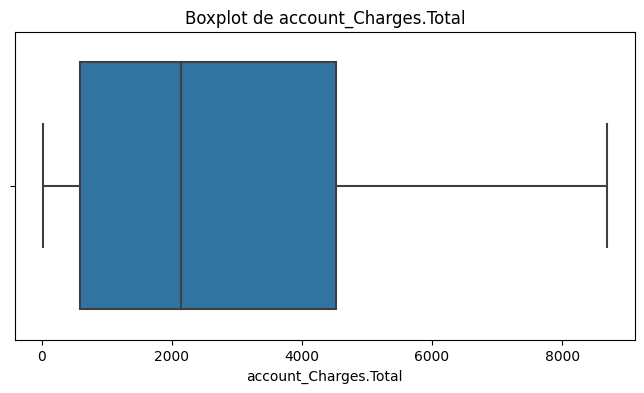

In [37]:

# exclui os registros NaN
df_normalizado.dropna(subset=['account_Charges.Total'], inplace=True)
analise_numerica_completa(df_normalizado, 'account_Charges.Total')

## Confira os valores únicos de cada coluna.

In [38]:
for coluna in df_normalizado.columns:
        valores_unicos = df_normalizado[coluna].unique()
        quantidade_valores_unicos = len(valores_unicos)

        print(f"Coluna: {coluna}")
        print(f"Quantidade de valores únicos: {quantidade_valores_unicos}")
        print(f"Valores únicos: {valores_unicos}")
        print("-" * 40)  # separador

Coluna: Churn
Quantidade de valores únicos: 2
Valores únicos: ['NO' 'YES']
----------------------------------------
Coluna: customer_gender
Quantidade de valores únicos: 2
Valores únicos: ['FEMALE' 'MALE']
----------------------------------------
Coluna: customer_SeniorCitizen
Quantidade de valores únicos: 2
Valores únicos: [0 1]
----------------------------------------
Coluna: customer_Partner
Quantidade de valores únicos: 2
Valores únicos: ['YES' 'NO']
----------------------------------------
Coluna: customer_Dependents
Quantidade de valores únicos: 2
Valores únicos: ['YES' 'NO']
----------------------------------------
Coluna: customer_tenure
Quantidade de valores únicos: 72
Valores únicos: [ 9.  4. 13.  3. 71. 63.  7. 65. 54. 72.  5. 56. 34.  1. 45. 23. 55. 37.
 66. 20. 59. 27.  2. 25. 29. 14. 35. 64. 39. 40. 11.  6. 30. 70. 57. 58.
 16. 69. 32. 49. 33. 21. 26. 50. 61. 15. 44. 12. 22. 19. 47. 62. 10. 52.
 60. 48. 46. 67. 28.  8. 41. 53. 68. 31. 36. 17. 18. 51. 24. 43. 42. 38.]
----

## Analisar a tipagem dos dados obtidos.

In [39]:
# percorre todas as Series do DataFrame e identifica os tipos de dados.
for coluna in df_normalizado:
    tipos_unicos = df_normalizado[coluna].apply(type).unique()
    print(f"Coluna: {coluna} - Tipos de dados: {tipos_unicos}")

Coluna: Churn - Tipos de dados: [<class 'str'>]
Coluna: customer_gender - Tipos de dados: [<class 'str'>]
Coluna: customer_SeniorCitizen - Tipos de dados: [<class 'int'>]
Coluna: customer_Partner - Tipos de dados: [<class 'str'>]
Coluna: customer_Dependents - Tipos de dados: [<class 'str'>]
Coluna: customer_tenure - Tipos de dados: [<class 'float'>]
Coluna: phone_PhoneService - Tipos de dados: [<class 'str'>]
Coluna: phone_MultipleLines - Tipos de dados: [<class 'str'>]
Coluna: internet_InternetService - Tipos de dados: [<class 'str'>]
Coluna: internet_OnlineSecurity - Tipos de dados: [<class 'str'>]
Coluna: internet_OnlineBackup - Tipos de dados: [<class 'str'>]
Coluna: internet_DeviceProtection - Tipos de dados: [<class 'str'>]
Coluna: internet_TechSupport - Tipos de dados: [<class 'str'>]
Coluna: internet_StreamingTV - Tipos de dados: [<class 'str'>]
Coluna: internet_StreamingMovies - Tipos de dados: [<class 'str'>]
Coluna: account_Contract - Tipos de dados: [<class 'str'>]
Coluna: 

# <h1> <font color='red'>DESAFIO:</font> Entender quais informações o conjunto de dados possui.

# <h1> <font color='red'>DESAFIO:</font> Verificar quais são as inconsistências nos dados

## Conferir se há nulos no conjunto de dados e fazer o tratamento adequadas.

In [40]:
import pandas as pd
for coluna in df_normalizado.columns:
    nulos = df_normalizado[coluna].isna().sum()
    espacos_em_branco = df_normalizado[coluna].apply(lambda x: str(x).isspace()).sum()

    print(f"Coluna: {coluna}")
    print(f"Valores nulos ou ausentes: {nulos}")
    print(f"Campos preenchidos apenas com espaço: {espacos_em_branco}")
    print("-" * 40)  # separador

Coluna: Churn
Valores nulos ou ausentes: 0
Campos preenchidos apenas com espaço: 0
----------------------------------------
Coluna: customer_gender
Valores nulos ou ausentes: 0
Campos preenchidos apenas com espaço: 0
----------------------------------------
Coluna: customer_SeniorCitizen
Valores nulos ou ausentes: 0
Campos preenchidos apenas com espaço: 0
----------------------------------------
Coluna: customer_Partner
Valores nulos ou ausentes: 0
Campos preenchidos apenas com espaço: 0
----------------------------------------
Coluna: customer_Dependents
Valores nulos ou ausentes: 0
Campos preenchidos apenas com espaço: 0
----------------------------------------
Coluna: customer_tenure
Valores nulos ou ausentes: 0
Campos preenchidos apenas com espaço: 0
----------------------------------------
Coluna: phone_PhoneService
Valores nulos ou ausentes: 0
Campos preenchidos apenas com espaço: 0
----------------------------------------
Coluna: phone_MultipleLines
Valores nulos ou ausentes: 0


As correções crísticas, como tratamento de dados ausentes, foram realizadas durante a análise exploratória individual de cada feature.

In [41]:
df_normalizado.head()

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,NO,FEMALE,0,YES,YES,9.0,YES,NO,DSL,NO,YES,NO,YES,YES,NO,ONE YEAR,YES,MAILED CHECK,65.6,593.30
1,NO,MALE,0,NO,NO,9.0,YES,YES,DSL,NO,NO,NO,NO,NO,YES,MONTH-TO-MONTH,NO,MAILED CHECK,59.9,542.40
2,YES,MALE,0,NO,NO,4.0,YES,NO,FIBER OPTIC,NO,NO,YES,NO,NO,NO,MONTH-TO-MONTH,YES,ELECTRONIC CHECK,73.9,280.85
3,YES,MALE,1,YES,NO,13.0,YES,NO,FIBER OPTIC,NO,YES,YES,NO,YES,YES,MONTH-TO-MONTH,YES,ELECTRONIC CHECK,98.0,1237.85
4,YES,FEMALE,1,YES,NO,3.0,YES,NO,FIBER OPTIC,NO,NO,NO,YES,YES,NO,MONTH-TO-MONTH,YES,MAILED CHECK,83.9,267.40


# <h1><font color='red'> DESAFIO:</font> Criar visualizações relevantes em relação ao Churn

Nesta parte é interessante focar em quais visualizações serão melhores para apresentar, e para isso podemos ver o vídeo Data Visualization: tipos de visualização. Os gráficos podem ser feitos usando o Matplotlib, Seaborn ou alguma outra biblioteca gráfica da sua escolha.

Algumas das análises gráficas que podem ser realizadas são:

Funções

In [42]:
import plotly.express as px

def criar_grafico_barras_empilhadas(df, coluna_x, coluna_cor, titulo, rotulo_y):
    # Agrupar os dados pelas colunas especificadas e contar a frequência
    df_agrupado = df.groupby([coluna_x, coluna_cor]).size().reset_index(name='count')

    # Criar o gráfico de barras empilhadas
    fig = px.bar(df_agrupado, x=coluna_x, y='count', color=coluna_cor,
                 title=titulo, labels={'count': rotulo_y})

    # Mostrar o gráfico
    fig.show()


def criar_grafico_boxplot(df, coluna_numerica, coluna_categorica, titulo):
    # Criar o gráfico de boxplot
    fig = px.box(df, x=coluna_categorica, y=coluna_numerica,
                 title=titulo, labels={coluna_numerica: 'Customer Tenure', coluna_categorica: 'Churn'})

    # Mostrar o gráfico
    fig.show()

###Distribuição da variável gênero por Churn

In [43]:
criar_grafico_barras_empilhadas(df_normalizado, 'customer_gender', 'Churn',
                                'Comparação de Churn por Gênero do Cliente',
                                'Quantidade de Clientes')

###Distribuição da variável InternetService por Churn

In [44]:
criar_grafico_barras_empilhadas(df_normalizado, 'internet_InternetService', 'Churn',
                                'Comparação de Churn por Tipo de Serviço de Internet',
                                'Quantidade de Clientes')

###Distribuição da variável OnlineSecurity por Churn

In [45]:
criar_grafico_barras_empilhadas(df_normalizado, 'internet_OnlineSecurity', 'Churn',
                                'Comparação de Churn por internet_OnlineSecurity',
                                'Quantidade de Clientes')

###Distribuição da variável DeviceProtection por Churn

In [46]:
criar_grafico_barras_empilhadas(df_normalizado, 'internet_DeviceProtection', 'Churn',
                                'Comparação de Churn por internet_DeviceProtection',
                                'Quantidade de Clientes')

###Distribuição da variável TechSupport por Churn

In [47]:
criar_grafico_barras_empilhadas(df_normalizado, 'internet_TechSupport', 'Churn',
                                'Comparação de Churn por internet_TechSupport',
                                'Quantidade de Clientes')

###Distribuição da variável Contract por Churn

In [48]:
criar_grafico_barras_empilhadas(df_normalizado, 'account_Contract', 'Churn',
                                'Comparação de Churn por account_Contract',
                                'Quantidade de Clientes')

###Distribuição da variável PaymentMethod por Churn

In [49]:
criar_grafico_barras_empilhadas(df_normalizado, 'account_PaymentMethod', 'Churn',
                                'Comparação de Churn por account_PaymentMethod',
                                'Quantidade de Clientes')

###Distribuição da variável SeniorCitizen por Churn

In [50]:
criar_grafico_barras_empilhadas(df_normalizado, 'customer_SeniorCitizen', 'Churn',
                                'Comparação de Churn por customer_SeniorCitizen',
                                'Quantidade de Clientes')

###Boxplot para as variáveis numéricas

In [51]:
# Exemplo de uso da função
criar_grafico_boxplot(df_normalizado, 'customer_tenure', 'Churn',
                      'Comparação de Customer Tenure por Churn')

In [52]:
# Exemplo de uso da função
criar_grafico_boxplot(df_normalizado, 'account_Charges.Monthly', 'Churn',
                      'Comparação de account_Charges.Monthly por Churn')

In [53]:
# Exemplo de uso da função
criar_grafico_boxplot(df_normalizado, 'account_Charges.Total', 'Churn',
                      'Comparação de account_Charges.Total por Churn')

# <h1><font color='red'> DESAFIO:</font> Aplicar encoding adequado nos dados

Realize a tranformações da variáveis que são categóricas com mais de duas categorias com o encoder correto.

## customer_gender

Análise da variável categórica: customer_gender

Tipos de dados: [<class 'str'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 2

Valores únicos:  ['FEMALE' 'MALE']

Contagem de frequência dos valores:
MALE      2775
FEMALE    2737
Name: customer_gender, dtype: int64



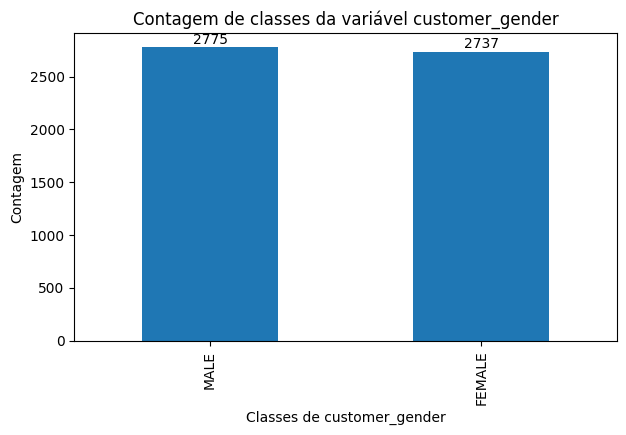

In [54]:
analise_categorica(df_normalizado, 'customer_gender')

In [55]:
# Aplicando one-hot encoding à coluna 'customer_gender'
one_hot = pd.get_dummies(df_normalizado['customer_gender'], prefix='customer_gender')

# Juntar as novas colunas ao DataFrame original e remover a coluna 'customer_gender' antiga
df_normalizado = pd.concat([df_normalizado, one_hot], axis=1)

# Exclui a coluna original
df_normalizado.drop('customer_gender', axis=1, inplace=True)

Análise da variável categórica: customer_gender_FEMALE

Tipos de dados: [<class 'int'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 2

Valores únicos:  [1 0]

Contagem de frequência dos valores:
0    2775
1    2737
Name: customer_gender_FEMALE, dtype: int64



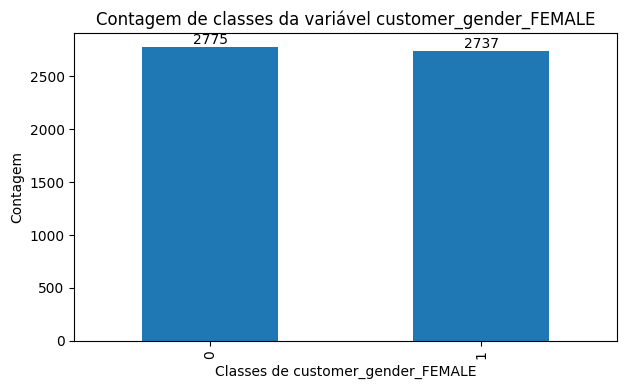

In [56]:
analise_categorica(df_normalizado, 'customer_gender_FEMALE')

Análise da variável categórica: customer_gender_MALE

Tipos de dados: [<class 'int'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 2

Valores únicos:  [0 1]

Contagem de frequência dos valores:
1    2775
0    2737
Name: customer_gender_MALE, dtype: int64



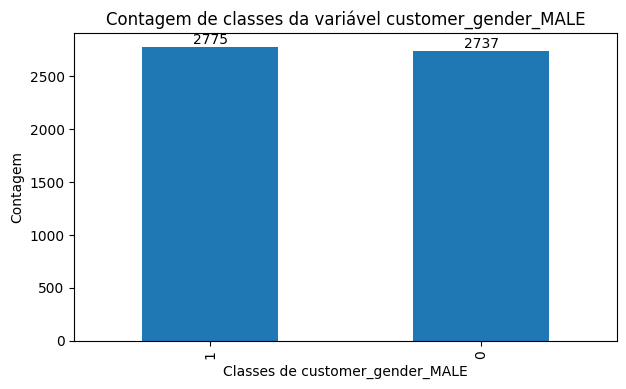

In [57]:
analise_categorica(df_normalizado, 'customer_gender_MALE')

##customer_tenure

In [58]:
df_normalizado['customer_tenure'] = pd.to_numeric(df_normalizado['customer_tenure'], errors='coerce')

In [59]:
# Definindo os intervalos e labels para as categorias
bins = [0, 5, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-5', '6-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']

# Criando uma nova coluna com as categorias
df_normalizado['tenure_group'] = pd.cut(df_normalizado['customer_tenure'], bins=bins, labels=labels, right=False)

# Aplicando one-hot encoding à coluna de categorias
df_one_hot = pd.get_dummies(df_normalizado['tenure_group'], prefix='tenure')

# Concatenando as novas colunas ao DataFrame original
df_normalizado = pd.concat([df_normalizado, df_one_hot], axis=1)

# Descartando as colunas 'customer_tenure' e 'tenure_group'
df_normalizado.drop(['customer_tenure', 'tenure_group'], axis=1, inplace=True)

Análise da variável categórica: tenure_0-5

Tipos de dados: [<class 'int'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 2

Valores únicos:  [0 1]

Contagem de frequência dos valores:
0    4575
1     937
Name: tenure_0-5, dtype: int64



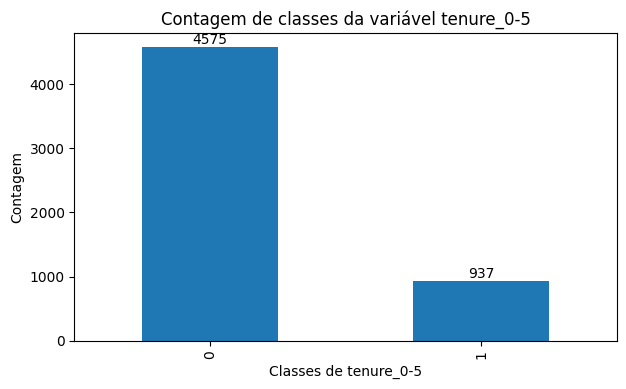

In [60]:
analise_categorica(df_normalizado, 'tenure_0-5')

Análise da variável categórica: tenure_6-10

Tipos de dados: [<class 'int'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 2

Valores únicos:  [1 0]

Contagem de frequência dos valores:
0    5028
1     484
Name: tenure_6-10, dtype: int64



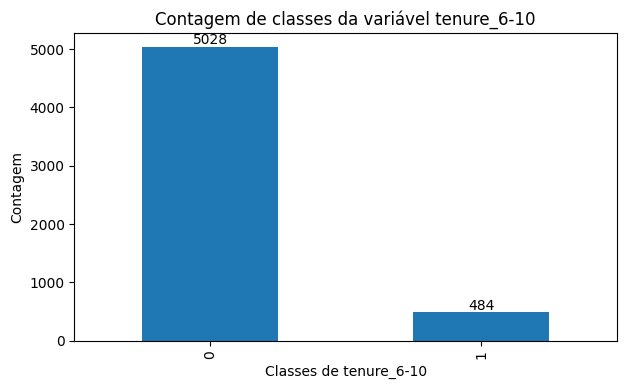

In [61]:
analise_categorica(df_normalizado, 'tenure_6-10')

Análise da variável categórica: tenure_11-20

Tipos de dados: [<class 'int'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 2

Valores únicos:  [0 1]

Contagem de frequência dos valores:
0    4788
1     724
Name: tenure_11-20, dtype: int64



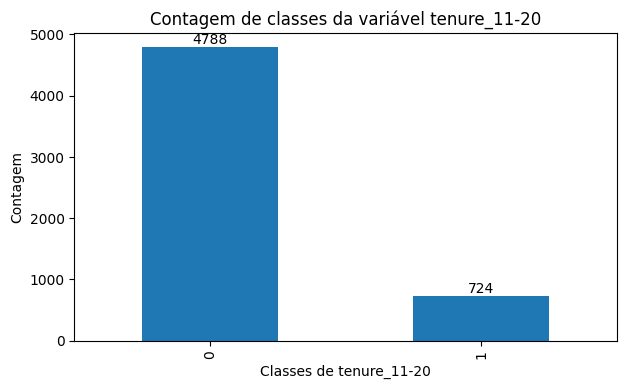

In [62]:
analise_categorica(df_normalizado, 'tenure_11-20')

Análise da variável categórica: tenure_21-30

Tipos de dados: [<class 'int'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 2

Valores únicos:  [0 1]

Contagem de frequência dos valores:
0    4922
1     590
Name: tenure_21-30, dtype: int64



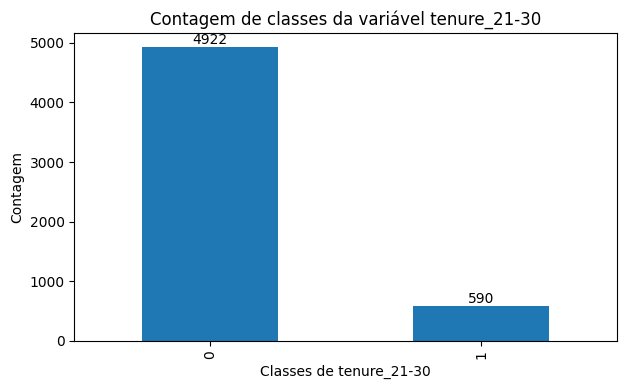

In [63]:
analise_categorica(df_normalizado, 'tenure_21-30')

Análise da variável categórica: tenure_31-40

Tipos de dados: [<class 'int'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 2

Valores únicos:  [0 1]

Contagem de frequência dos valores:
0    4994
1     518
Name: tenure_31-40, dtype: int64



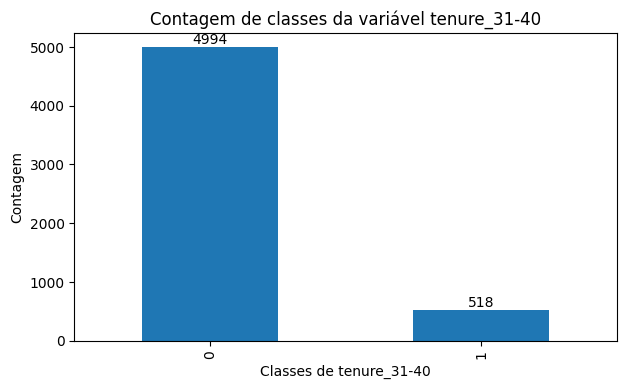

In [64]:
analise_categorica(df_normalizado, 'tenure_31-40')

Análise da variável categórica: tenure_41-50

Tipos de dados: [<class 'int'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 2

Valores únicos:  [0 1]

Contagem de frequência dos valores:
0    4998
1     514
Name: tenure_41-50, dtype: int64



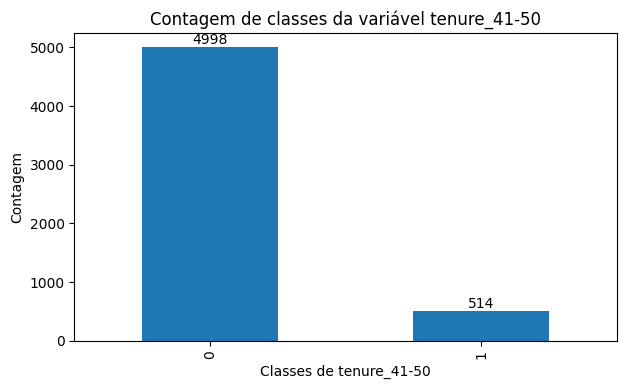

In [65]:
analise_categorica(df_normalizado, 'tenure_41-50')

Análise da variável categórica: tenure_61-70

Tipos de dados: [<class 'int'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 2

Valores únicos:  [0 1]

Contagem de frequência dos valores:
0    4841
1     671
Name: tenure_61-70, dtype: int64



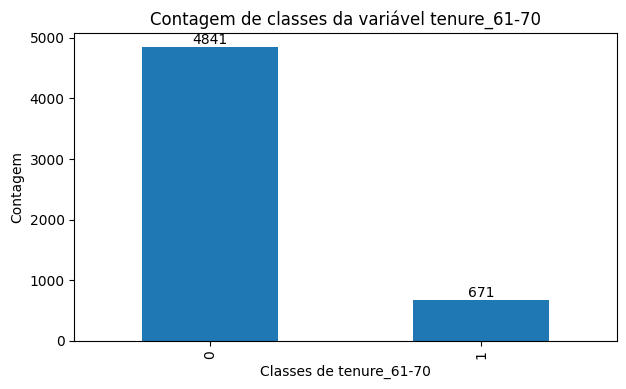

In [66]:
analise_categorica(df_normalizado, 'tenure_61-70')

Análise da variável categórica: tenure_71-80

Tipos de dados: [<class 'int'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 2

Valores únicos:  [0 1]

Contagem de frequência dos valores:
0    4988
1     524
Name: tenure_71-80, dtype: int64



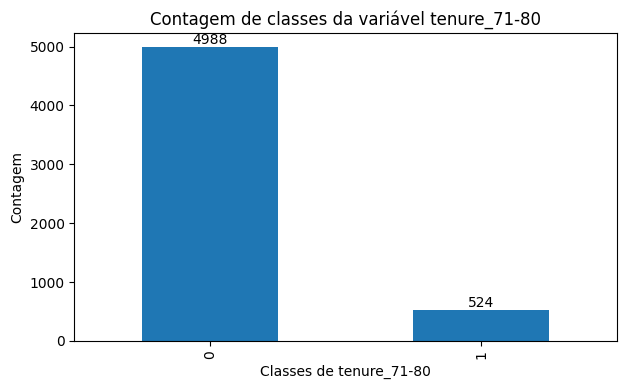

In [67]:
analise_categorica(df_normalizado, 'tenure_71-80')

##account_Contract

Análise da variável categórica: account_Contract

Tipos de dados: [<class 'str'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 3

Valores únicos:  ['ONE YEAR' 'MONTH-TO-MONTH' 'TWO YEAR']

Contagem de frequência dos valores:
MONTH-TO-MONTH    3351
ONE YEAR          1109
TWO YEAR          1052
Name: account_Contract, dtype: int64



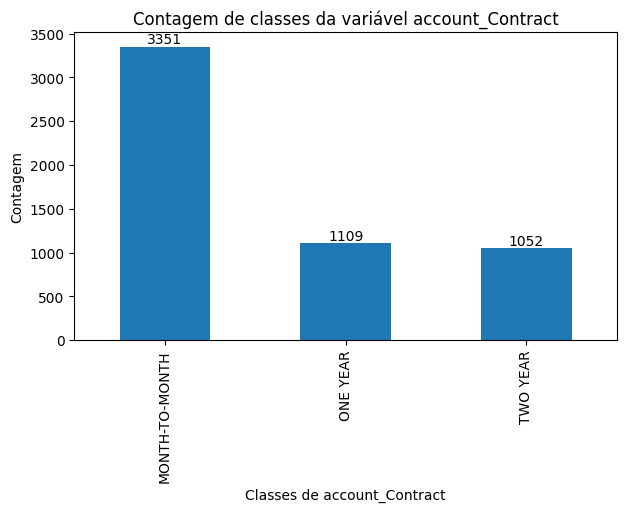

In [68]:
analise_categorica(df_normalizado, 'account_Contract')

In [69]:
# Aplicando one-hot encoding à coluna 'internet_InternetService'
one_hot = pd.get_dummies(df_normalizado['account_Contract'], prefix='account_Contract')

# Juntar as novas colunas ao DataFrame original e remover a coluna 'internet_InternetService' antiga
df_normalizado = pd.concat([df_normalizado, one_hot], axis=1)

# Exclui a coluna original
df_normalizado.drop('account_Contract', axis=1, inplace=True)

Análise da variável categórica: account_Contract_MONTH-TO-MONTH

Tipos de dados: [<class 'int'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 2

Valores únicos:  [0 1]

Contagem de frequência dos valores:
1    3351
0    2161
Name: account_Contract_MONTH-TO-MONTH, dtype: int64



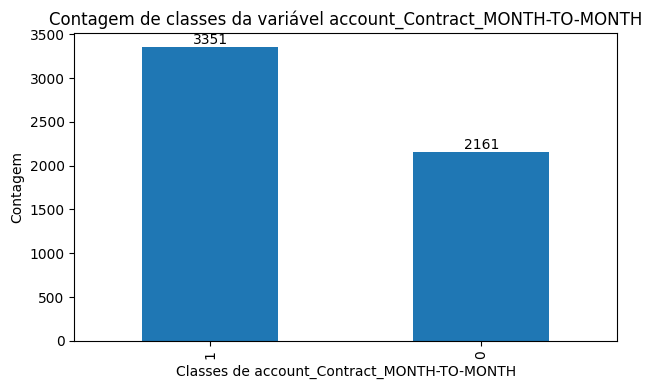

In [70]:
analise_categorica(df_normalizado, 'account_Contract_MONTH-TO-MONTH')

Análise da variável categórica: account_Contract_ONE YEAR

Tipos de dados: [<class 'int'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 2

Valores únicos:  [1 0]

Contagem de frequência dos valores:
0    4403
1    1109
Name: account_Contract_ONE YEAR, dtype: int64



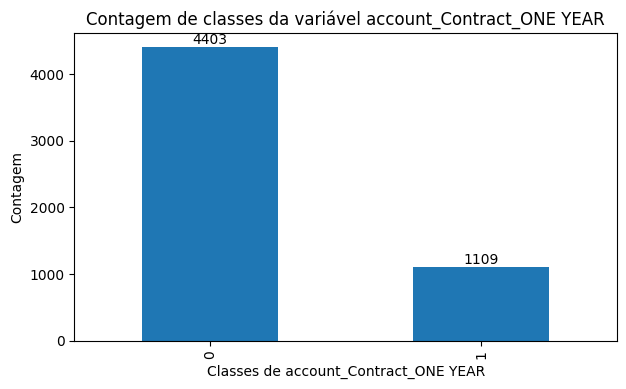

In [71]:
analise_categorica(df_normalizado, 'account_Contract_ONE YEAR')

Análise da variável categórica: account_Contract_TWO YEAR

Tipos de dados: [<class 'int'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 2

Valores únicos:  [0 1]

Contagem de frequência dos valores:
0    4460
1    1052
Name: account_Contract_TWO YEAR, dtype: int64



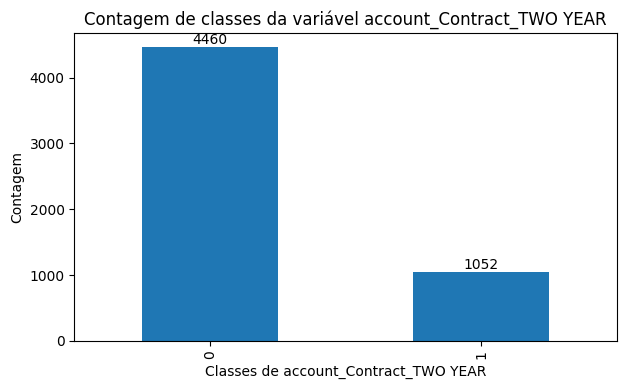

In [72]:
analise_categorica(df_normalizado, 'account_Contract_TWO YEAR')

##account_PaymentMethod

Análise da variável categórica: account_PaymentMethod

Tipos de dados: [<class 'str'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 4

Valores únicos:  ['MAILED CHECK' 'ELECTRONIC CHECK' 'CREDIT CARD (AUTOMATIC)'
 'BANK TRANSFER (AUTOMATIC)']

Contagem de frequência dos valores:
ELECTRONIC CHECK             2243
BANK TRANSFER (AUTOMATIC)    1210
CREDIT CARD (AUTOMATIC)      1190
MAILED CHECK                  869
Name: account_PaymentMethod, dtype: int64



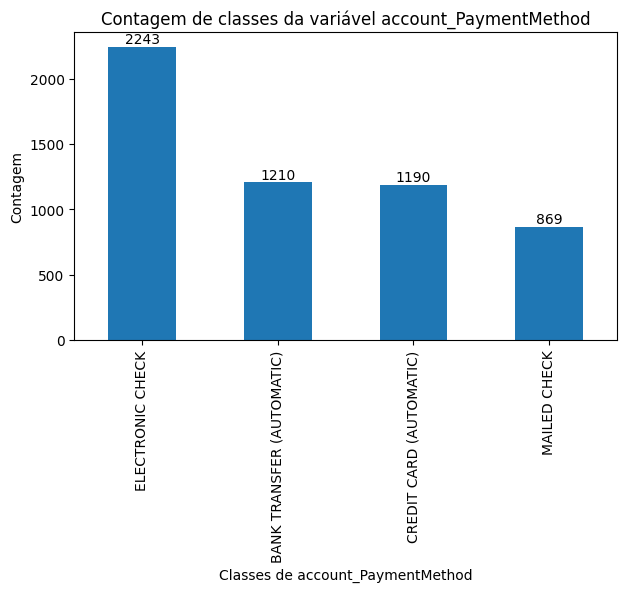

In [73]:
analise_categorica(df_normalizado, 'account_PaymentMethod')

In [74]:
# Aplicando one-hot encoding à coluna 'internet_InternetService'
one_hot = pd.get_dummies(df_normalizado['account_PaymentMethod'], prefix='account_PaymentMethod')

# Juntar as novas colunas ao DataFrame original e remover a coluna 'internet_InternetService' antiga
df_normalizado = pd.concat([df_normalizado, one_hot], axis=1)

# Exclui a coluna original
df_normalizado.drop('account_PaymentMethod', axis=1, inplace=True)

Análise da variável categórica: account_PaymentMethod_BANK TRANSFER (AUTOMATIC)

Tipos de dados: [<class 'int'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 2

Valores únicos:  [0 1]

Contagem de frequência dos valores:
0    4302
1    1210
Name: account_PaymentMethod_BANK TRANSFER (AUTOMATIC), dtype: int64



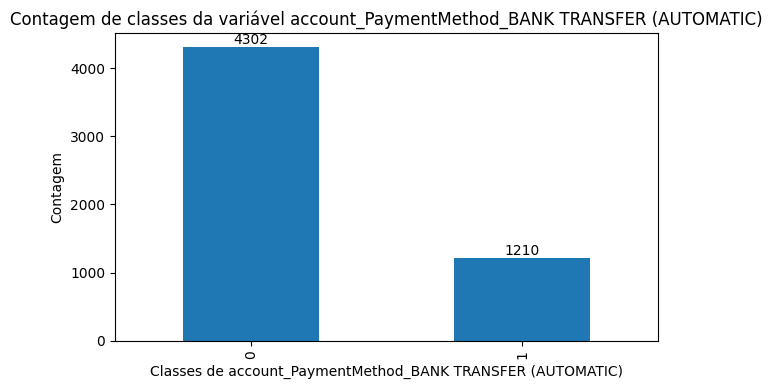

In [75]:
analise_categorica(df_normalizado, 'account_PaymentMethod_BANK TRANSFER (AUTOMATIC)')

Análise da variável categórica: account_PaymentMethod_CREDIT CARD (AUTOMATIC)

Tipos de dados: [<class 'int'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 2

Valores únicos:  [0 1]

Contagem de frequência dos valores:
0    4322
1    1190
Name: account_PaymentMethod_CREDIT CARD (AUTOMATIC), dtype: int64



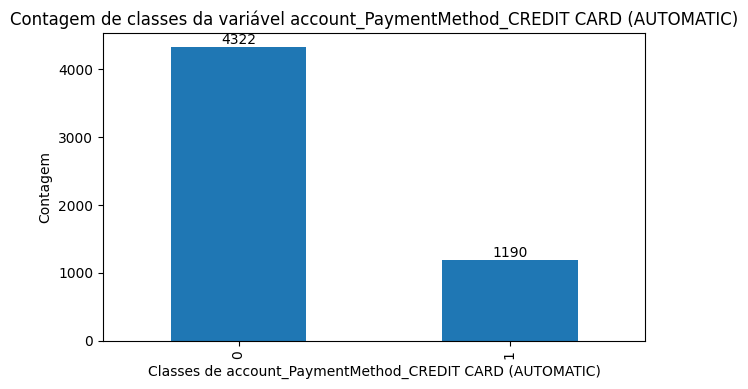

In [76]:
analise_categorica(df_normalizado, 'account_PaymentMethod_CREDIT CARD (AUTOMATIC)')

Análise da variável categórica: account_PaymentMethod_ELECTRONIC CHECK

Tipos de dados: [<class 'int'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 2

Valores únicos:  [0 1]

Contagem de frequência dos valores:
0    3269
1    2243
Name: account_PaymentMethod_ELECTRONIC CHECK, dtype: int64



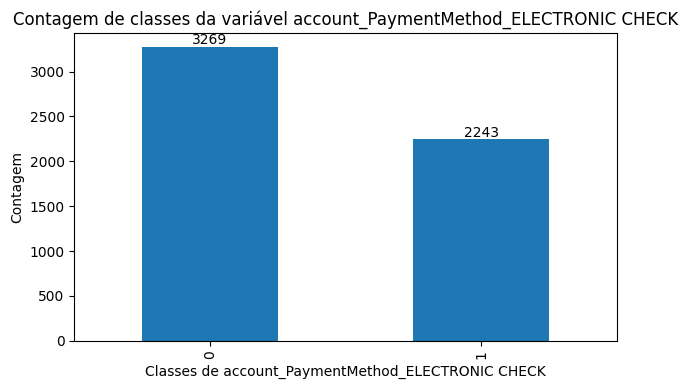

In [77]:
analise_categorica(df_normalizado, 'account_PaymentMethod_ELECTRONIC CHECK')

Análise da variável categórica: account_PaymentMethod_MAILED CHECK

Tipos de dados: [<class 'int'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 2

Valores únicos:  [1 0]

Contagem de frequência dos valores:
0    4643
1     869
Name: account_PaymentMethod_MAILED CHECK, dtype: int64



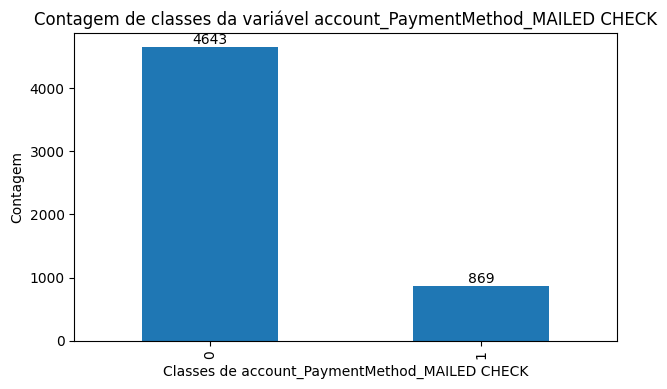

In [78]:
analise_categorica(df_normalizado, 'account_PaymentMethod_MAILED CHECK')

##account_Charges.Monthly

Análise da variável numérica: ACCOUNT_CHARGES.MONTHLY

Tipo de dado: float64

Média: 76.86

Mediana: 79.5

Moda: 84.8

Desvio Padrão: 21.93

Valor Mínimo: 23.45

Valor Máximo: 118.75

1º Quartil: 59.95

3º Quartil: 94.45

Intervalo Interquartil (IQR): 34.5



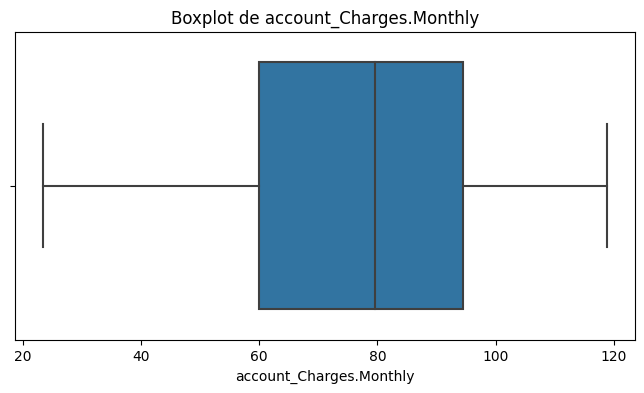

In [79]:
analise_numerica_completa(df_normalizado, 'account_Charges.Monthly')

In [80]:
bins = [0, 50, 100, 150]
labels = ['0-50', '51-100', '101-150']

# Criando uma nova coluna com as categorias
df_normalizado['monthly_charges_group'] = pd.cut(df_normalizado['account_Charges.Monthly'], bins=bins, labels=labels, right=False)

# Aplicando one-hot encoding à coluna de categorias
df_one_hot = pd.get_dummies(df_normalizado['monthly_charges_group'], prefix='monthly_charges')

# Concatenando o DataFrame original com o DataFrame de one-hot encoding
df_normalizado = pd.concat([df_normalizado, df_one_hot], axis=1)

# Excluindo as colunas originais e a coluna de categorias temporária
df_normalizado.drop(['account_Charges.Monthly', 'monthly_charges_group'], axis=1, inplace=True)

Análise da variável categórica: monthly_charges_0-50

Tipos de dados: [<class 'int'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 2

Valores únicos:  [0 1]

Contagem de frequência dos valores:
0    4744
1     768
Name: monthly_charges_0-50, dtype: int64



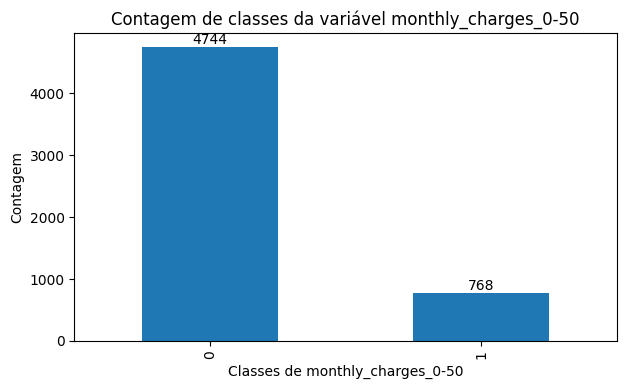

In [81]:
analise_categorica(df_normalizado, 'monthly_charges_0-50')

Análise da variável categórica: monthly_charges_51-100

Tipos de dados: [<class 'int'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 2

Valores únicos:  [1 0]

Contagem de frequência dos valores:
1    3836
0    1676
Name: monthly_charges_51-100, dtype: int64



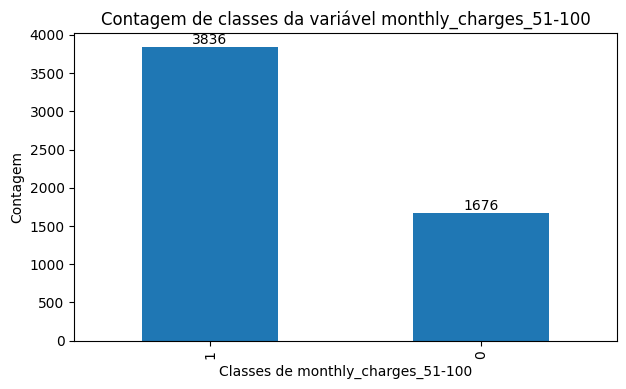

In [82]:
analise_categorica(df_normalizado, 'monthly_charges_51-100')

Análise da variável categórica: monthly_charges_101-150

Tipos de dados: [<class 'int'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 2

Valores únicos:  [0 1]

Contagem de frequência dos valores:
0    4604
1     908
Name: monthly_charges_101-150, dtype: int64



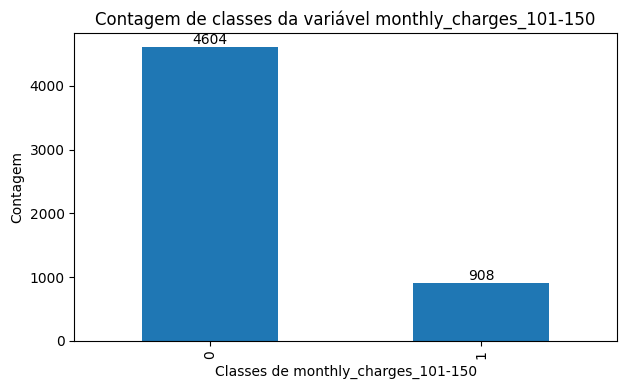

In [83]:
analise_categorica(df_normalizado, 'monthly_charges_101-150')

Todos os registros (mesmo outliers) foram incluídos na categorização da variável numérica, pois podem conter informações relevantes na detecção de Churn. Serão utilizados algoritmos mais robustos à outliers durante a modelagem.

##account_Charges.Total

Análise da variável numérica: ACCOUNT_CHARGES.TOTAL

Tipo de dado: float64

Média: 2729.51

Mediana: 2139.15

Moda: 45.3

Desvio Padrão: 2355.68

Valor Mínimo: 23.45

Valor Máximo: 8684.8

1º Quartil: 586.84

3º Quartil: 4528.0

Intervalo Interquartil (IQR): 3941.16



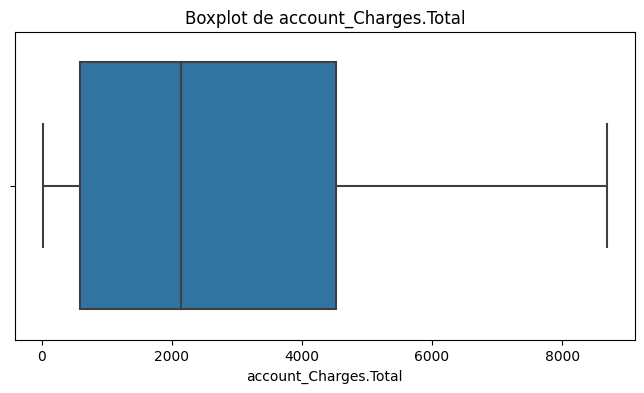

In [84]:
analise_numerica_completa(df_normalizado, 'account_Charges.Total')

In [85]:
# Definindo os intervalos e rótulos para as categorias
# Os intervalos são apenas um exemplo e devem ser ajustados conforme o seu entendimento dos dados e do domínio.
bins = [0, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]
labels = ['0-500', '501-1000', '1001-2000', '2001-3000', '3001-4000', '4001-5000', '5001-6000', '6001-7000', '7001-8000', '8001-9000']

# Criando uma nova coluna com as categorias
df_normalizado['account_charges_group'] = pd.cut(df_normalizado['account_Charges.Total'], bins=bins, labels=labels, right=False)

# Aplicando one-hot encoding à coluna de categorias
df_one_hot = pd.get_dummies(df_normalizado['account_charges_group'], prefix='account_charges')

# Concatenando as novas colunas ao DataFrame original
df_normalizado = pd.concat([df_normalizado, df_one_hot], axis=1)

# Removendo as colunas 'account_Charges.Total' e 'account_charges_group' se necessário
df_normalizado.drop(['account_Charges.Total', 'account_charges_group'], axis=1, inplace=True)

Análise da variável categórica: account_charges_0-500

Tipos de dados: [<class 'int'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 2

Valores únicos:  [0 1]

Contagem de frequência dos valores:
0    4256
1    1256
Name: account_charges_0-500, dtype: int64



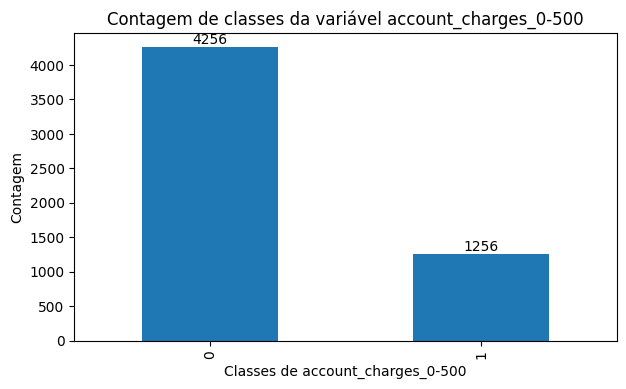

In [86]:
analise_categorica(df_normalizado, 'account_charges_0-500')

Análise da variável categórica: account_charges_501-1000

Tipos de dados: [<class 'int'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 2

Valores únicos:  [1 0]

Contagem de frequência dos valores:
0    4937
1     575
Name: account_charges_501-1000, dtype: int64



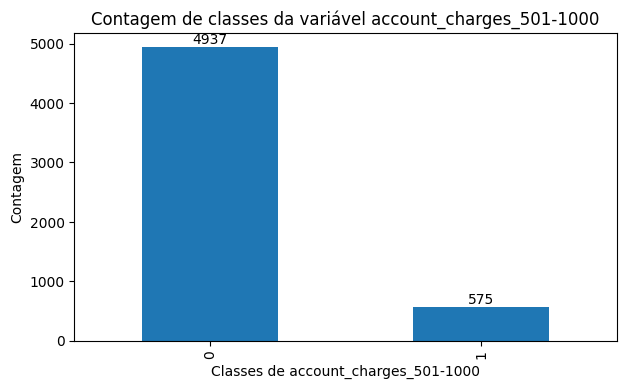

In [87]:
analise_categorica(df_normalizado, 'account_charges_501-1000')

Análise da variável categórica: account_charges_1001-2000

Tipos de dados: [<class 'int'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 2

Valores únicos:  [0 1]

Contagem de frequência dos valores:
0    4686
1     826
Name: account_charges_1001-2000, dtype: int64



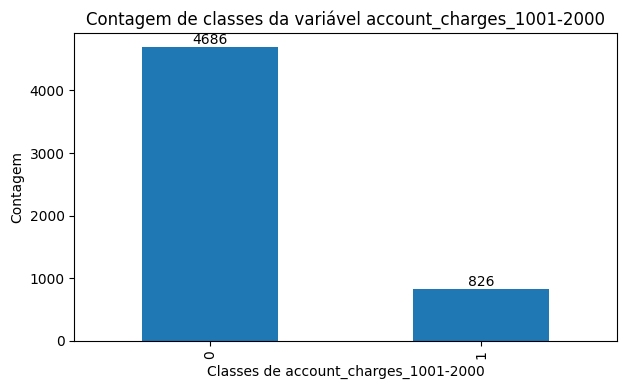

In [88]:
analise_categorica(df_normalizado, 'account_charges_1001-2000')

Análise da variável categórica: account_charges_2001-3000

Tipos de dados: [<class 'int'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 2

Valores únicos:  [0 1]

Contagem de frequência dos valores:
0    4861
1     651
Name: account_charges_2001-3000, dtype: int64



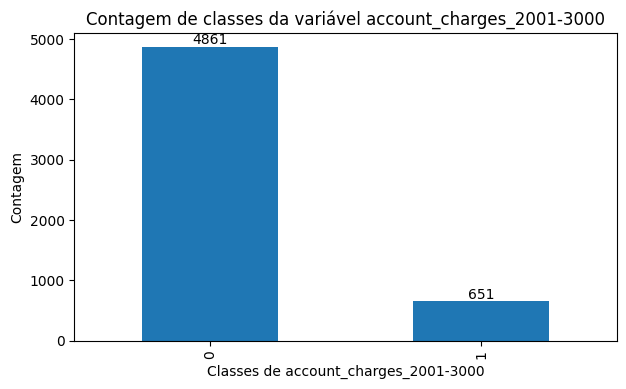

In [89]:
analise_categorica(df_normalizado, 'account_charges_2001-3000')

Análise da variável categórica: account_charges_3001-4000

Tipos de dados: [<class 'int'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 2

Valores únicos:  [0 1]

Contagem de frequência dos valores:
0    4956
1     556
Name: account_charges_3001-4000, dtype: int64



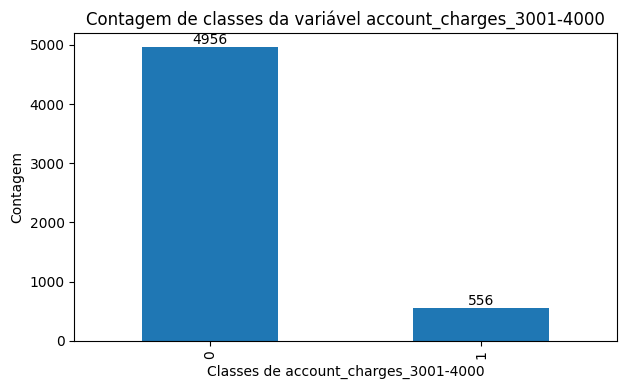

In [90]:
analise_categorica(df_normalizado, 'account_charges_3001-4000')

Análise da variável categórica: account_charges_4001-5000

Tipos de dados: [<class 'int'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 2

Valores únicos:  [0 1]

Contagem de frequência dos valores:
0    4999
1     513
Name: account_charges_4001-5000, dtype: int64



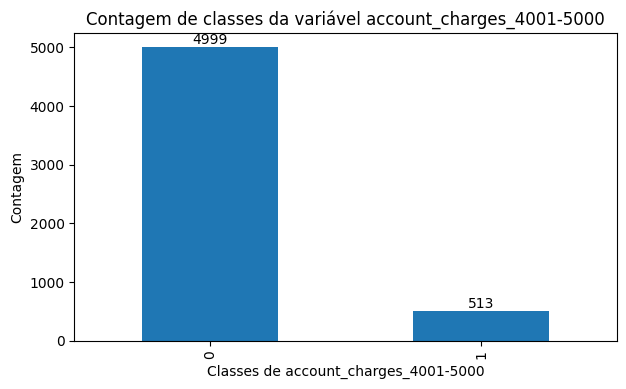

In [91]:
analise_categorica(df_normalizado, 'account_charges_4001-5000')

Análise da variável categórica: account_charges_5001-6000

Tipos de dados: [<class 'int'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 2

Valores únicos:  [0 1]

Contagem de frequência dos valores:
0    5069
1     443
Name: account_charges_5001-6000, dtype: int64



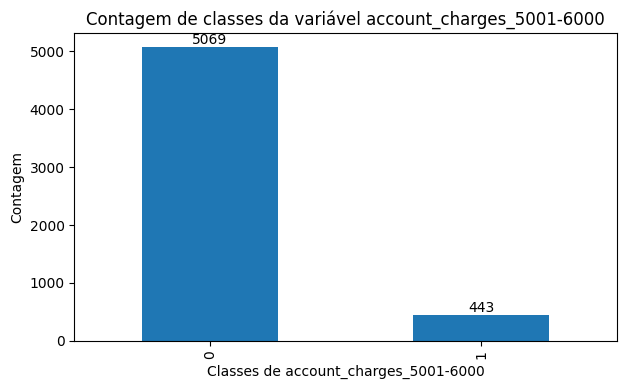

In [92]:
analise_categorica(df_normalizado, 'account_charges_5001-6000')

Análise da variável categórica: account_charges_7001-8000

Tipos de dados: [<class 'int'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 2

Valores únicos:  [0 1]

Contagem de frequência dos valores:
0    5263
1     249
Name: account_charges_7001-8000, dtype: int64



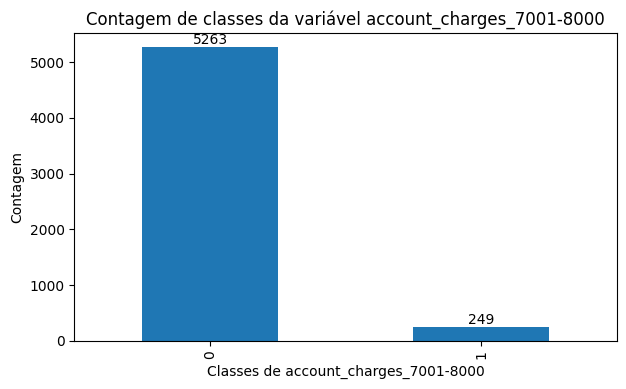

In [93]:
analise_categorica(df_normalizado, 'account_charges_7001-8000')

Análise da variável categórica: account_charges_8001-9000

Tipos de dados: [<class 'int'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 2

Valores únicos:  [0 1]

Contagem de frequência dos valores:
0    5434
1      78
Name: account_charges_8001-9000, dtype: int64



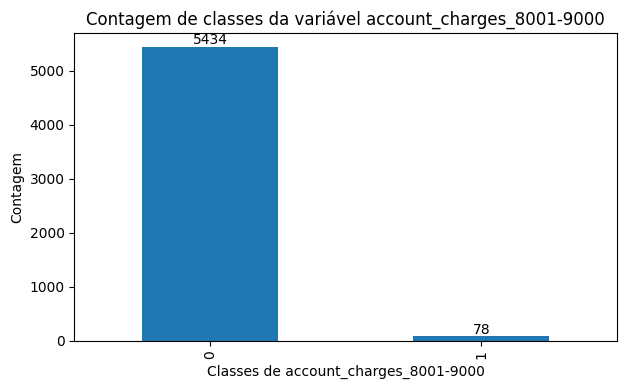

In [94]:
analise_categorica(df_normalizado, 'account_charges_8001-9000')

##internet_InternetService

Análise da variável categórica: internet_InternetService

Tipos de dados: [<class 'str'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 2

Valores únicos:  ['DSL' 'FIBER OPTIC']

Contagem de frequência dos valores:
FIBER OPTIC    3096
DSL            2416
Name: internet_InternetService, dtype: int64



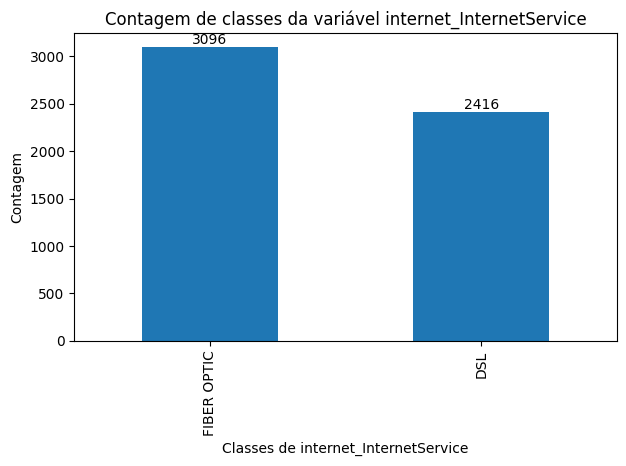

In [95]:
analise_categorica(df_normalizado, 'internet_InternetService')

In [96]:
# Aplicando one-hot encoding à coluna 'internet_InternetService'
one_hot = pd.get_dummies(df_normalizado['internet_InternetService'], prefix='internet_InternetService')

# Juntar as novas colunas ao DataFrame original e
df_normalizado = pd.concat([df_normalizado, one_hot], axis=1)

# Remove a coluna 'internet_InternetService' antiga
df_normalizado=df_normalizado.drop('internet_InternetService', axis=1)

Análise da variável categórica: internet_InternetService_DSL

Tipos de dados: [<class 'int'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 2

Valores únicos:  [1 0]

Contagem de frequência dos valores:
0    3096
1    2416
Name: internet_InternetService_DSL, dtype: int64



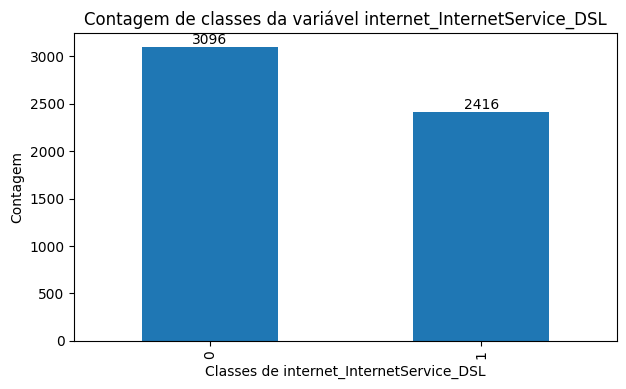

In [97]:
analise_categorica(df_normalizado, 'internet_InternetService_DSL')

Análise da variável categórica: internet_InternetService_FIBER OPTIC

Tipos de dados: [<class 'int'>]

Quantidade de valores nulos ou ausentes: 0

Quantidade de valores únicos: 2

Valores únicos:  [0 1]

Contagem de frequência dos valores:
1    3096
0    2416
Name: internet_InternetService_FIBER OPTIC, dtype: int64



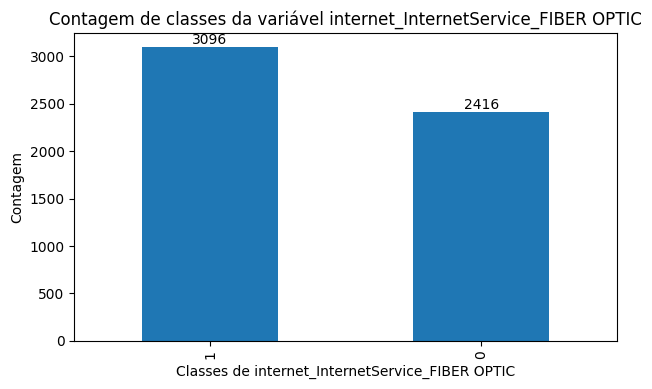

In [98]:
analise_categorica(df_normalizado, 'internet_InternetService_FIBER OPTIC')

In [99]:
df_normalizado.columns

Index(['Churn', 'customer_SeniorCitizen', 'customer_Partner',
       'customer_Dependents', 'phone_PhoneService', 'phone_MultipleLines',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies',
       'account_PaperlessBilling', 'customer_gender_FEMALE',
       'customer_gender_MALE', 'tenure_0-5', 'tenure_6-10', 'tenure_11-20',
       'tenure_21-30', 'tenure_31-40', 'tenure_41-50', 'tenure_51-60',
       'tenure_61-70', 'tenure_71-80', 'account_Contract_MONTH-TO-MONTH',
       'account_Contract_ONE YEAR', 'account_Contract_TWO YEAR',
       'account_PaymentMethod_BANK TRANSFER (AUTOMATIC)',
       'account_PaymentMethod_CREDIT CARD (AUTOMATIC)',
       'account_PaymentMethod_ELECTRONIC CHECK',
       'account_PaymentMethod_MAILED CHECK', 'monthly_charges_0-50',
       'monthly_charges_51-100', 'monthly_charges_101-150',
       'account_charges_0-500', 'account_charg

# <h1><font color='red'> DESAFIO:</font> Analisar a correlação das variáveis

A correlação pode ajudar a melhorar a precisão do modelo, removendo variáveis preditoras irrelevantes. Se uma variável não está fortemente correlacionada com a variável alvo, então é provável que seja uma variável pouco informativa e não acrescente informações relevantes para o modelo e em alguns casos podendo levar até mesmo ao overfitting.


In [109]:
df_normalizado.sample()

,Churn,customer_SeniorCitizen,customer_Partner,customer_Dependents,phone_PhoneService,phone_MultipleLines,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_PaperlessBilling,customer_gender_FEMALE,customer_gender_MALE,tenure_0-5,tenure_6-10,tenure_11-20,tenure_21-30,tenure_31-40,tenure_41-50,tenure_51-60,tenure_61-70,tenure_71-80,account_Contract_MONTH-TO-MONTH,account_Contract_ONE YEAR,account_Contract_TWO YEAR,account_PaymentMethod_BANK TRANSFER (AUTOMATIC),account_PaymentMethod_CREDIT CARD (AUTOMATIC),account_PaymentMethod_ELECTRONIC CHECK,account_PaymentMethod_MAILED CHECK,monthly_charges_0-50,monthly_charges_51-100,monthly_charges_101-150,account_charges_0-500,account_charges_501-1000,account_charges_1001-2000,account_charges_2001-3000,account_charges_3001-4000,account_charges_4001-5000,account_charges_5001-6000,account_charges_6001-7000,account_charges_7001-8000,account_charges_8001-9000,internet_InternetService_DSL,internet_InternetService_FIBER OPTIC
4815,0,0,0,1,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [101]:
replacement_dict = {'NO': 0, 'YES': 1}
df_normalizado = df_normalizado.replace(replacement_dict)

In [102]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# CARACTERÍSTICAS
X = df_normalizado.drop('Churn', axis=1)

# TARGET
y = df_normalizado['Churn']

# Aplicando o teste chi2
chi2_selector = SelectKBest(chi2, k=4)  # Seleciona as 4 melhores características
X_kbest = chi2_selector.fit_transform(X, y)

# Obtenha os nomes das colunas selecionadas
important_features_chi2 = [X.columns[i] for i in chi2_selector.get_support(indices=True)]

# Crie um novo DataFrame apenas com as características importantes
X_important_chi2 = X[important_features_chi2]

# Se você também quiser incluir a coluna alvo (target) no novo DataFrame
df_important_chi2 = X_important_chi2.copy()
df_important_chi2['Churn'] = y  # Adicionando a coluna de target de volta ao novo DataFrame


In [103]:
df_important_chi2.columns

Index(['tenure_0-5', 'account_Contract_MONTH-TO-MONTH',
       'account_Contract_TWO YEAR', 'account_charges_0-500', 'Churn'],
      dtype='object')

In [104]:
df_important_chi2

,tenure_0-5,account_Contract_MONTH-TO-MONTH,account_Contract_TWO YEAR,account_charges_0-500,Churn
0,0,0,0,0,0
1,0,1,0,0,0
2,1,1,0,1,1
3,0,1,0,0,1
4,1,1,0,1,1
...,...,...,...,...,...
7262,0,0,0,0,0
7263,0,1,0,0,1
7264,1,1,0,1,0
7265,0,0,1,0,0


In [108]:
# Exportando uma cópia do DataFrame criado utilizando apenas as features selecionadas por chi2
df_important_chi2.to_csv('df_chi2.csv', index=False)

# <h1><font color='blue'> EXTRA:</font> Utilizar a biblioteca plotly para fazer os gráficos

# <h1><font color='blue'> EXTRA:</font>Utilize alguma ferramenta de IA auxiliar no projeto

Utilize alguma ferramenta de IA para auxiliar na construção do projeto. Os chatbots, por exemplo, podem ajudar bastante a construir funcionalidades, oferecer insights e esclarecer dúvidas de código, entre outras funções. Tire bastante proveito dessas ferramentas.

Algumas ferramentas que podem ajudar são:

* ChatGPT
* Bing
* Bard
* Phind

<font color='gold'>Foi utilizado ChatGPT-4 (Advanced Data Analysis)